<a href="https://colab.research.google.com/github/RodrigoEduard/08MBID---Visualizacion-de-Datos/blob/main/TrabajoPracticoVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
conduccion_V2 = pd.read_excel('/content/drive/MyDrive/R/conduccion_V2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


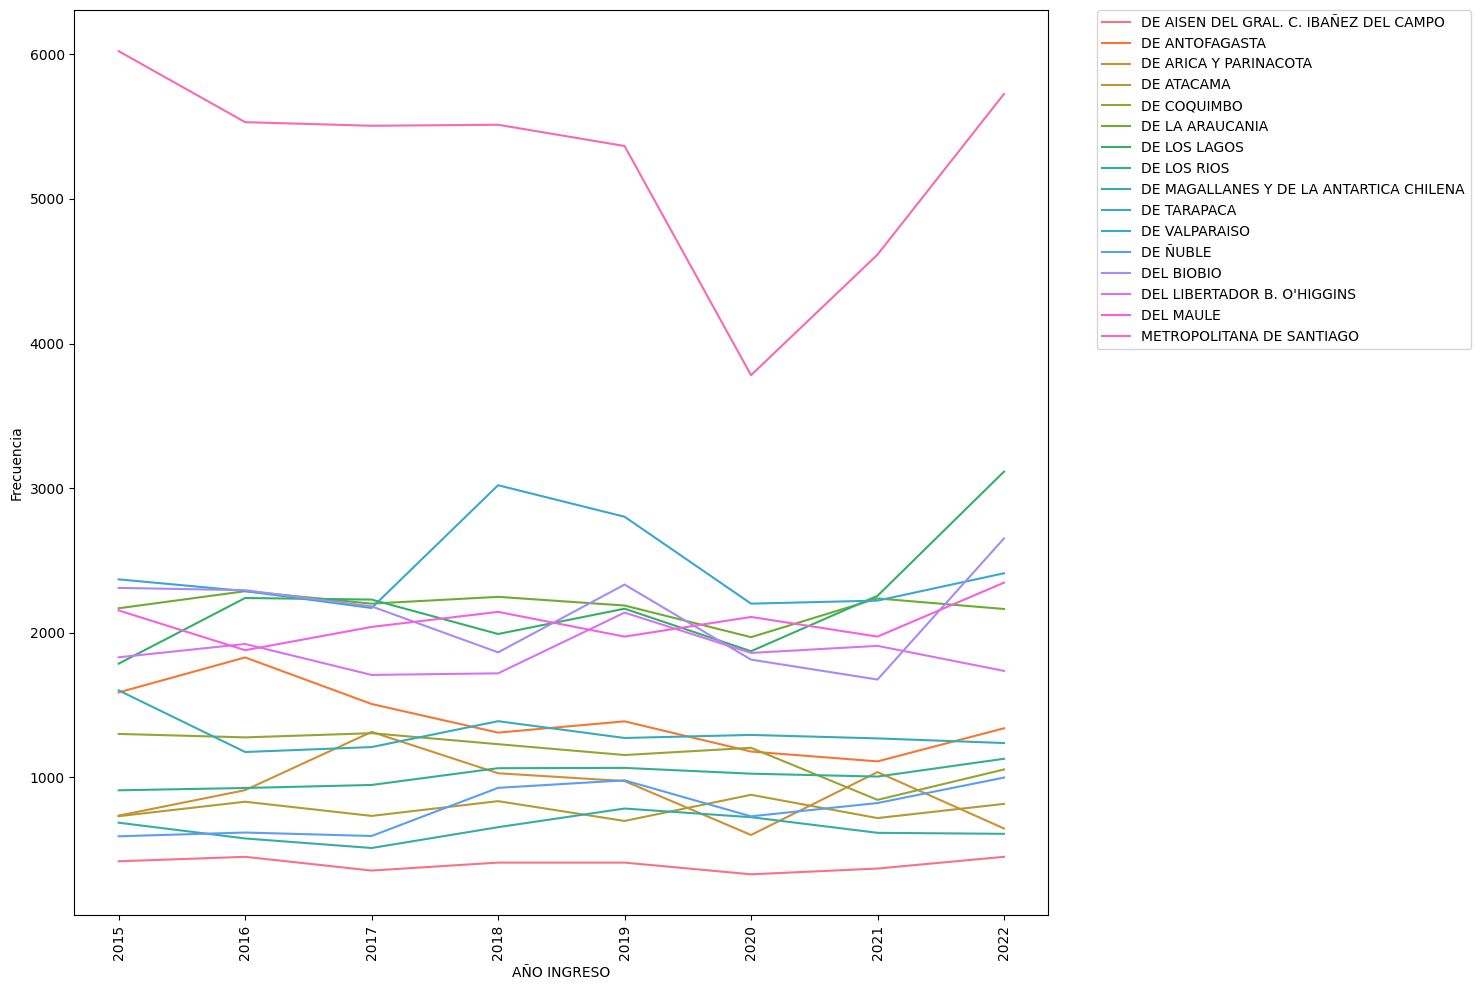

In [ ]:
table_reg_year = pd.crosstab(index=conduccion_V2['NOMBRE REGION'], columns=conduccion_V2['AÑO INGRESO'])
df = table_reg_year.reset_index()
df_melt = df.melt(id_vars='NOMBRE REGION', var_name='AÑO INGRESO', value_name='Frecuencia')
# Crear el gráfico
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_melt, x='AÑO INGRESO', y='Frecuencia', hue='NOMBRE REGION')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

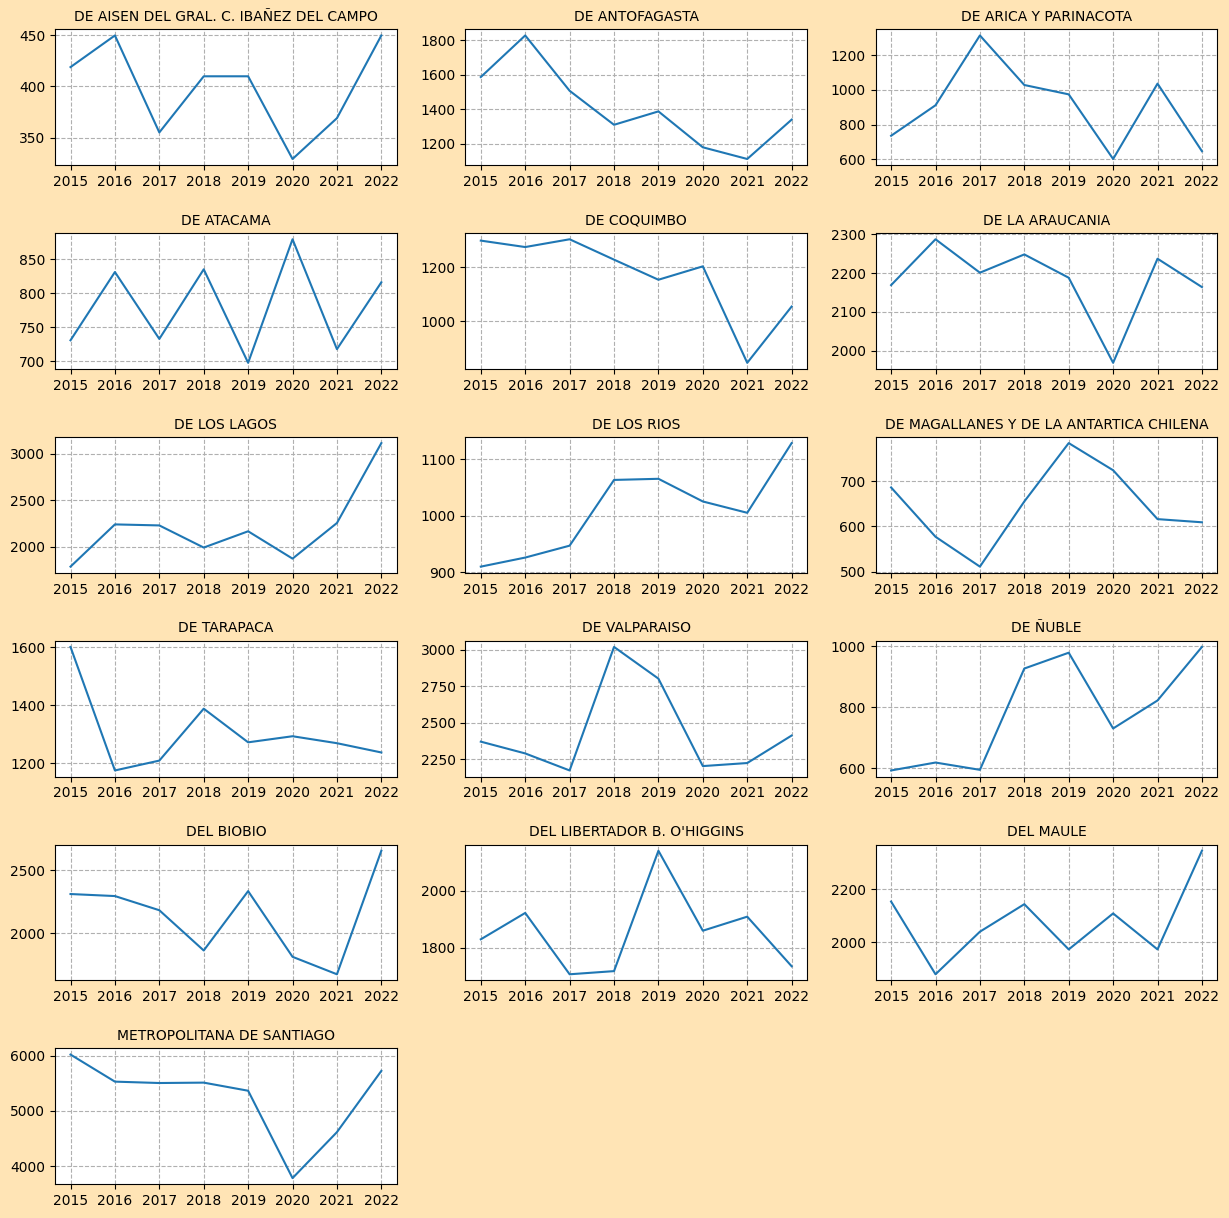

In [ ]:
table_reg_year = pd.crosstab(index=conduccion_V2['NOMBRE REGION'], columns=conduccion_V2['AÑO INGRESO'])
df = table_reg_year.reset_index()

df_melt = df.melt(id_vars='NOMBRE REGION', var_name='AÑO INGRESO', value_name='Freq')
fig, axs = plt.subplots((len(df_melt['NOMBRE REGION'].unique()) + 2) // 3, 3, figsize=(15, 15))
plt.subplots_adjust(hspace = 0.5)
for (region, group), ax in zip(df_melt.groupby('NOMBRE REGION'), axs.flatten()):
    group.plot(x='AÑO INGRESO', y='Freq', ax=ax, legend=False)
    ax.set_title(region, fontsize=10)
    ax.set_xlabel('')
    ax.grid(True, linestyle='--')
for ax in axs.flatten()[len(df_melt['NOMBRE REGION'].unique()):]:
    fig.delaxes(ax)
fig.patch.set_facecolor('moccasin')

plt.show()
